## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [0]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [27]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [34]:
# 載入 Callbacks
modelChectPoint = keras.callbacks.ModelCheckpoint(filepath='./tmp_save_weights_only.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

results = {}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[modelChectPoint]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

results['save_weights_only']  = {
    'train_loss': train_loss,
    'valid_loss': valid_loss,
    'train_acc': train_acc,
    'valid_acc': valid_acc
}

# Load back
model = keras.models.load_model("./tmp_save_weights_only.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
__________

ValueError: ignored

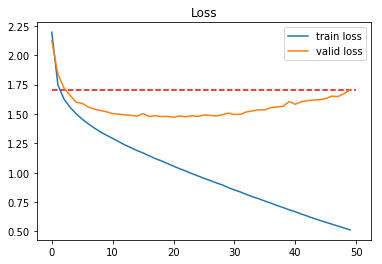

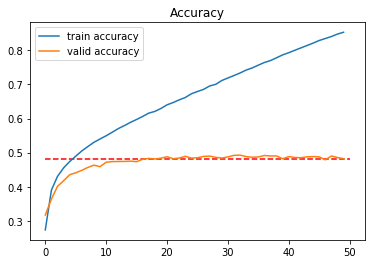

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(results['save_best_only_False']['train_loss'])), results['save_best_only_False']['train_loss'], label="train loss")
plt.plot(range(len(results['save_best_only_False']['valid_loss'])), results['save_best_only_False']['valid_loss'], label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(results['save_best_only_False']['train_loss']), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(results['save_best_only_False']['train_acc'])), results['save_best_only_False']['train_acc'], label="train accuracy")
plt.plot(range(len(results['save_best_only_False']['valid_acc'])), results['save_best_only_False']['valid_acc'], label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(results['save_best_only_False']['train_acc']), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(results['save_best_only_False']['train_loss'])), results['save_best_only_False']['train_loss'], label="train loss")
plt.plot(range(len(results['save_best_only_False']['valid_loss'])), results['save_best_only_False']['valid_loss'], label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(results['save_best_only_False']['train_loss']), colors='r', linestyles='--')
plt.legend()
plt.title("Loss (Save Weights Only)")
plt.show()

plt.plot(range(len(results['save_best_only_False']['train_acc'])), results['save_best_only_False']['train_acc'], label="train accuracy")
plt.plot(range(len(results['save_best_only_False']['valid_acc'])), results['save_best_only_False']['valid_acc'], label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(results['save_best_only_False']['train_acc']), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy (Save Weights Only)")
plt.show()